In [1]:
import sys
import os
import time
import numpy as np
import pandas as pd
import umap

print('NOVA_HOME is at', os.getenv('NOVA_HOME'))
sys.path.insert(1, os.getenv('NOVA_HOME'))
%load_ext autoreload
%autoreload 2

from src.common.utils import load_config_file
from src.embeddings.embeddings_utils import load_embeddings
from visualizations import *
from utils import *

NOVA_HOME is at /home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA
NOVA_HOME: /home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA


In [57]:
df = pd.read_csv('output_distances/rep_distances_stats_newNeuronsD8FigureConfig_UMAP2_B9_euclidean_detailed:True.csv')
# Remove the suffix "_Untreated" from both label columns
df['label1'] = df['label1'].str.replace(r'_Untreated', '', regex=True)
df['label2'] = df['label2'].str.replace(r'_Untreated', '', regex=True)

/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/examine_measures/visualizations.py:568: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


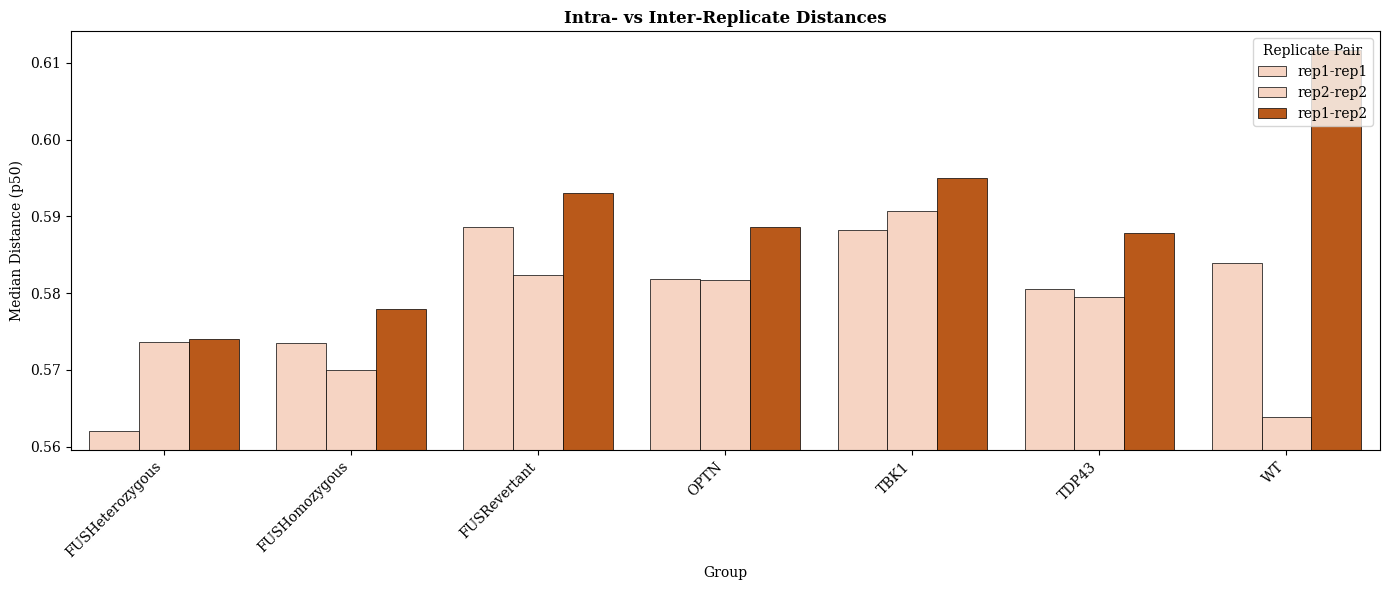

In [28]:
plot_replicate_bars(df)

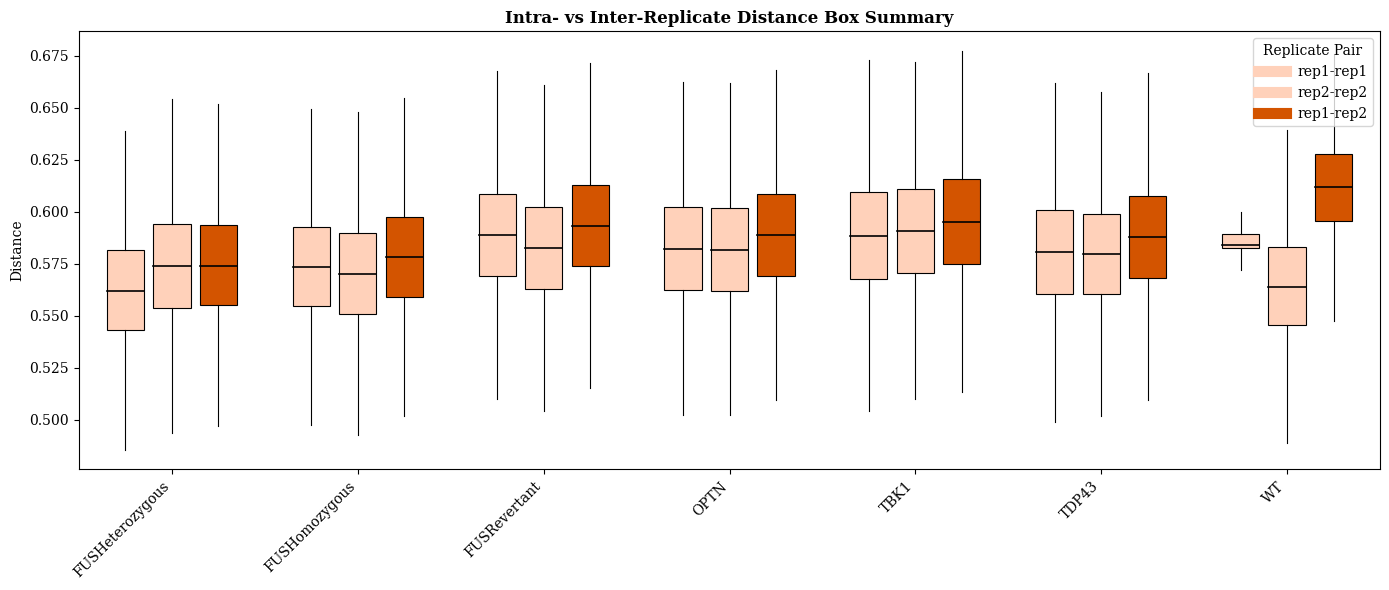

In [29]:
plot_replicate_boxes(df)

In [4]:
df.sort_values('total_pairs')

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p5,p10,p25,p50,p75,p90,p95,lower_whisker,upper_whisker
18,WT_rep1,WT_rep1,4,6,0.013965,0.052209,0.553929,0.563415,0.582419,0.583943,0.589287,0.593118,0.594381,0.572117,0.599590
19,WT_rep1,WT_rep2,4,4820,0.000555,0.000272,0.572515,0.580989,0.595493,0.611635,0.627600,0.642670,0.651674,0.547331,0.675762
6,FUSRevertant_rep1,FUSRevertant_rep1,136,9180,0.000693,0.000266,0.541063,0.551733,0.569065,0.588637,0.608515,0.626683,0.637597,0.509890,0.667691
5,FUSHomozygous_rep2,FUSHomozygous_rep2,301,45150,0.001385,0.000245,0.524203,0.534134,0.550850,0.570015,0.589720,0.607464,0.618490,0.492546,0.648024
0,FUSHeterozygous_rep1,FUSHeterozygous_rep1,304,46056,0.329494,0.175504,0.517287,0.526820,0.543118,0.562061,0.581394,0.599376,0.610627,0.485703,0.638809
12,TBK1_rep1,TBK1_rep1,307,46971,0.001249,0.000288,0.538221,0.549066,0.567486,0.588192,0.609622,0.629517,0.641162,0.504282,0.672826
3,FUSHomozygous_rep1,FUSHomozygous_rep1,318,50403,0.001238,0.000263,0.527621,0.537897,0.554539,0.573523,0.592468,0.610671,0.621526,0.497647,0.649360
7,FUSRevertant_rep1,FUSRevertant_rep2,136,54400,0.000411,0.000511,0.546258,0.556441,0.573734,0.593032,0.612751,0.631379,0.642388,0.515208,0.671276
2,FUSHeterozygous_rep2,FUSHeterozygous_rep2,384,73536,0.001438,0.000506,0.526033,0.536200,0.553747,0.573658,0.593876,0.611732,0.622288,0.493552,0.654071
11,OPTN_rep2,OPTN_rep2,400,79800,0.001707,0.000514,0.534573,0.544830,0.561985,0.581678,0.601872,0.620697,0.632296,0.502155,0.661703


In [36]:
df = pd.read_csv('output_distances/rep_distances_stats_newNeuronsD8FigureConfig_UMAP1_B9_euclidean_detailed:True.csv')
# Remove the suffix "_WT_Untreated" from both label columns
df['label1'] = df['label1'].str.replace(r'_WT_Untreated', '', regex=True)
df['label2'] = df['label2'].str.replace(r'_WT_Untreated', '', regex=True)

/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/examine_measures/visualizations.py:568: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


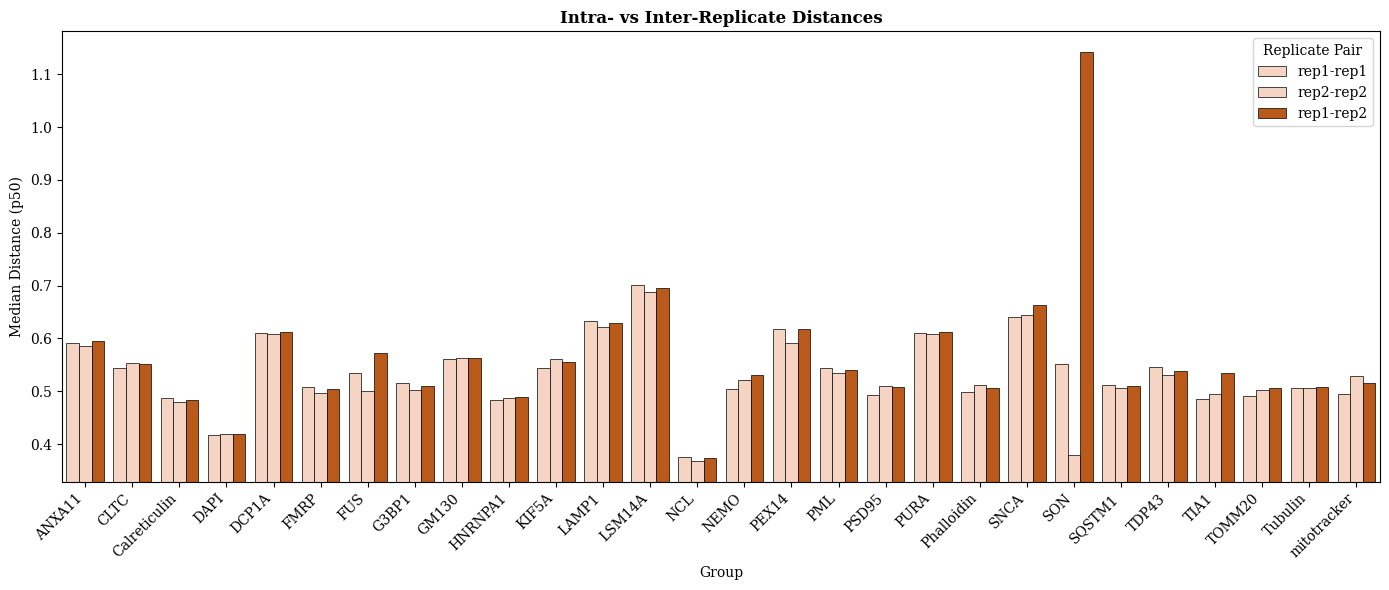

In [37]:
plot_replicate_bars(df)

In [38]:
def add_rep_and_label(df):
    # extract the numeric replicate from each label column
    df['rep1'] = df['label1'].str.extract(r'_rep(\d+)$').astype(int)
    df['rep2'] = df['label2'].str.extract(r'_rep(\d+)$').astype(int)
    # strip the “_repN” suffix to get the common label
    df['label'] = df['label1'].str.replace(r'_rep\d+$', '', regex=True)
    # reorder columns if you like
    cols = ['rep1', 'rep2', 'label'] + [c for c in df.columns if c not in ('rep1','rep2','label')]
    return df[cols]
df = add_rep_and_label(df)

In [39]:
df.sort_values('total_pairs')

,rep1,rep2,label,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p5,p10,p25,p50,p75,p90,p95,lower_whisker,upper_whisker
63,1,1,SON,SON_rep1,SON_rep1,4,6,0.000856,0.010059,0.378156,0.403003,0.457242,0.551240,0.631914,0.749148,0.807714,0.195233,0.893923
64,1,2,SON,SON_rep1,SON_rep2,4,13208,0.014444,0.000405,1.090803,1.103867,1.122609,1.142288,1.161059,1.178669,1.188380,1.064935,1.218733
54,1,1,PURA,PURA_rep1,PURA_rep1,953,453628,0.015240,0.000528,0.421397,0.456366,0.523068,0.609428,0.704852,0.793114,0.847595,0.250394,0.977527
15,1,1,FMRP,FMRP_rep1,FMRP_rep1,1148,658378,0.014922,0.007238,0.360996,0.388633,0.440342,0.508787,0.590486,0.676459,0.730969,0.215127,0.815701
60,1,1,SNCA,SNCA_rep1,SNCA_rep1,1151,661825,0.008772,0.001856,0.404026,0.446705,0.530051,0.640597,0.760560,0.866531,0.934313,0.184287,1.106323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,1,2,NEMO,NEMO_rep1,NEMO_rep2,3424,11473824,0.014525,0.008671,0.347905,0.381800,0.446557,0.531316,0.629470,0.726888,0.785881,0.172186,0.903841
13,1,2,DCP1A,DCP1A_rep1,DCP1A_rep2,3451,11650576,0.008359,0.023958,0.421084,0.456348,0.523490,0.613051,0.720271,0.825832,0.887942,0.228320,1.015441
9,1,1,DAPI,DAPI_rep1,DAPI_rep1,30203,456095503,0.316884,12.565813,0.250286,0.279443,0.337737,0.417664,0.515492,0.621924,0.694745,0.071104,0.782126
11,2,2,DAPI,DAPI_rep2,DAPI_rep2,32837,539117866,0.253847,15.511421,0.249435,0.278896,0.337995,0.419377,0.519614,0.628472,0.702763,0.065565,0.792043


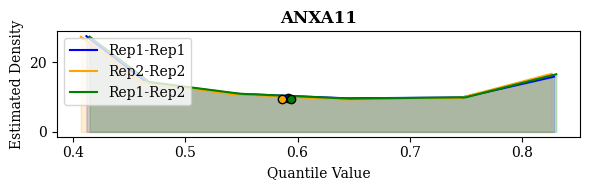

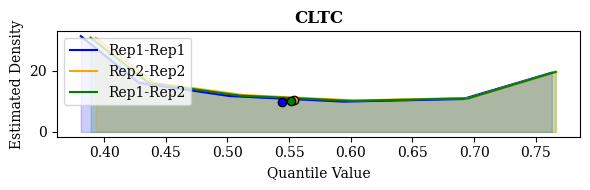

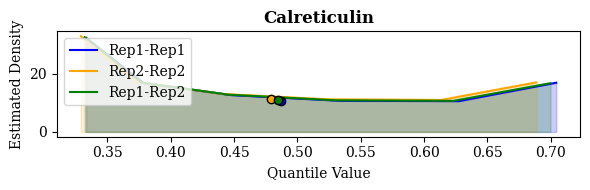

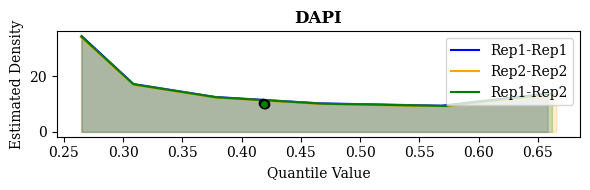

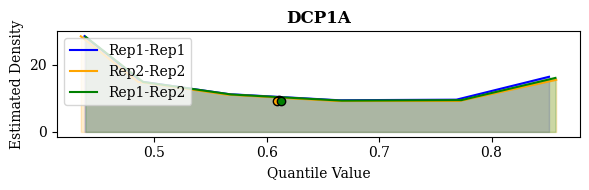

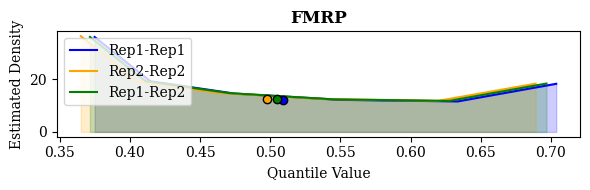

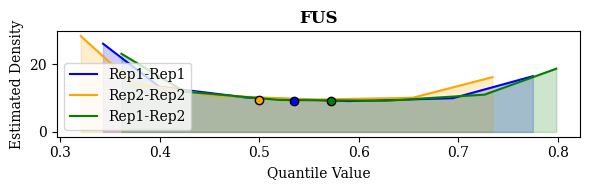

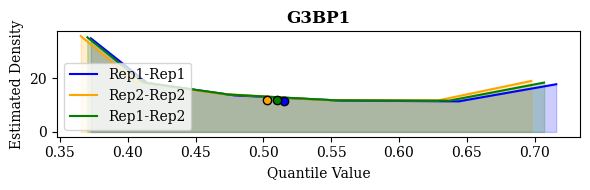

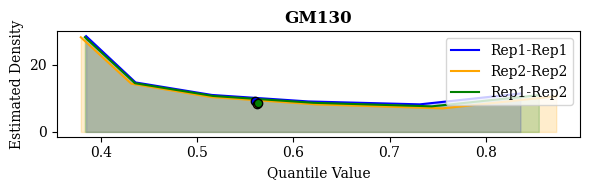

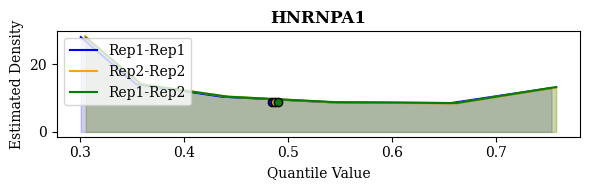

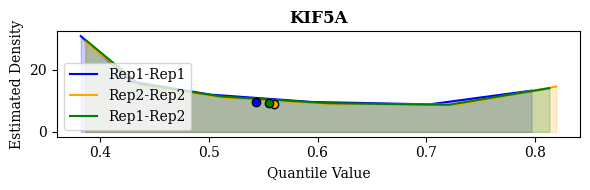

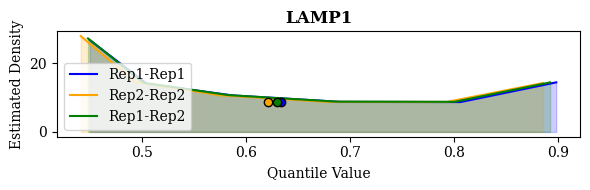

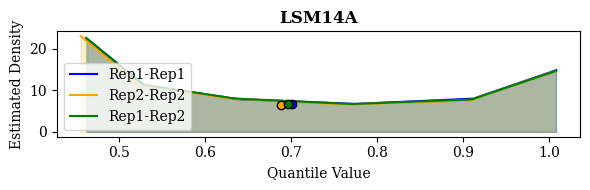

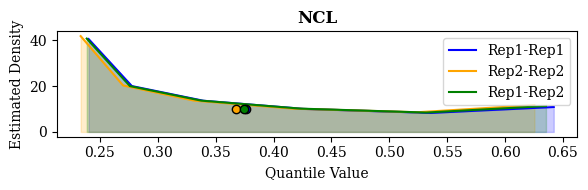

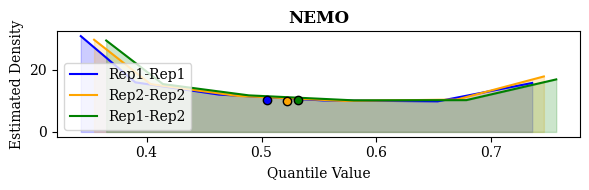

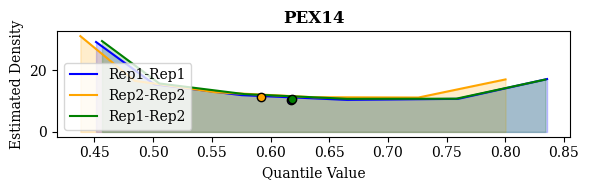

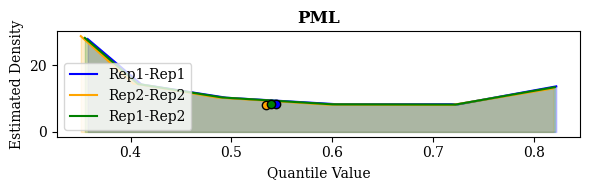

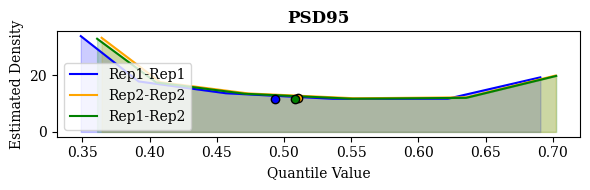

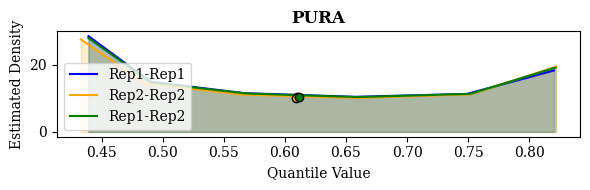

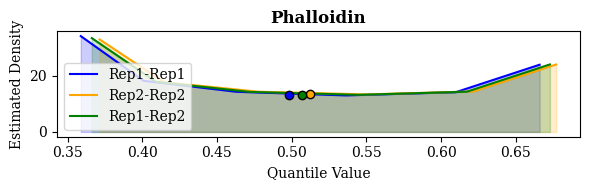

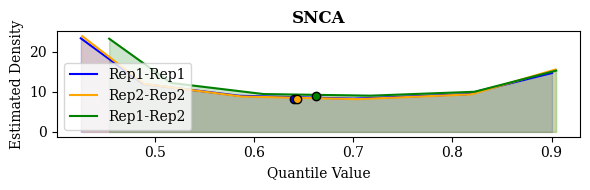

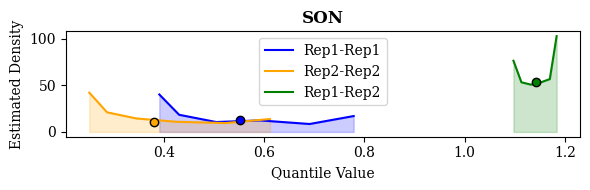

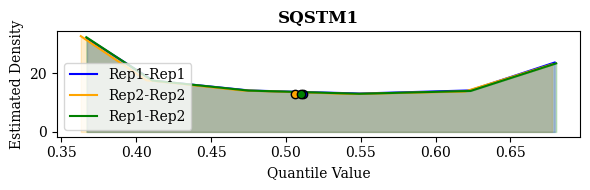

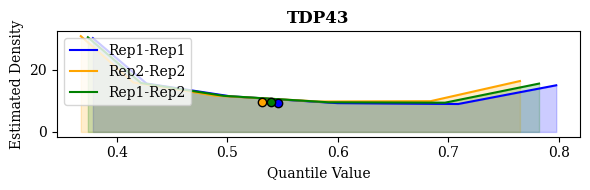

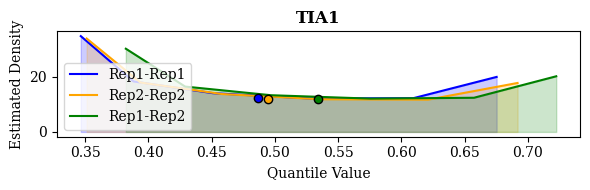

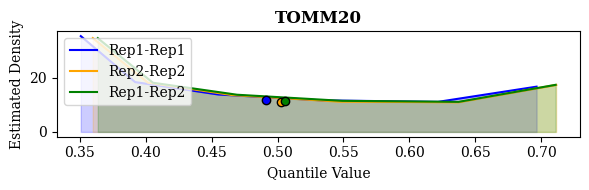

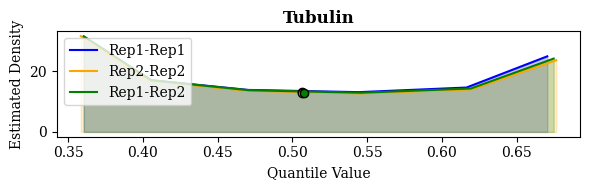

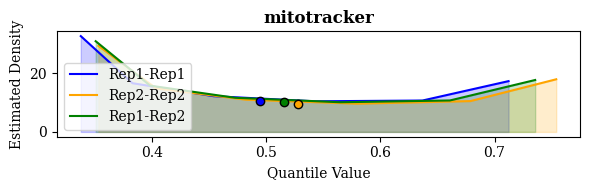

In [11]:
quantiles = ['p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95']

conditions = [
    {'rep1': 1, 'rep2': 1, 'label': 'Rep1-Rep1', 'color': 'blue'},
    {'rep1': 2, 'rep2': 2, 'label': 'Rep2-Rep2', 'color': 'orange'},
    {'rep1': 1, 'rep2': 2, 'label': 'Rep1-Rep2', 'color': 'green'},
]

for label in df.label.unique():
    plt.figure(figsize=(6, 2))

    for cond in conditions:
        group = df[
            (df.label == label) &
            (df.rep1 == cond['rep1']) &
            (df.rep2 == cond['rep2'])
        ]
        if group.empty:
            continue

        q = group[quantiles].iloc[0].values
        bin_edges = q
        bin_heights = 1 / np.diff(bin_edges)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Plot histogram curve
        plt.plot(bin_centers, bin_heights, label=cond['label'], color=cond['color'])
        plt.fill_between(bin_centers, 0, bin_heights, alpha=0.2, color=cond['color'])

        # Plot median point (aligned to height)
        median = group['p50'].iloc[0]
        bin_idx = np.searchsorted(bin_edges, median, side='right') - 1
        if 0 <= bin_idx < len(bin_heights):
            plt.scatter([median], [bin_heights[bin_idx]], color=cond['color'], edgecolor='k', zorder=5)

    plt.title(label)
    plt.xlabel('Quantile Value')
    plt.ylabel('Estimated Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [34]:
def check_approx_normality(row, tolerance=0.1):
    q25, q50, q75 = row['p25'], row['p50'], row['p75']
    p5, p95 = row['p5'], row['p95']
    lw, uw = row['lower_whisker'], row['upper_whisker']
    
    iqr = q75 - q25
    if iqr == 0:
        return False  # can't assess if all quantiles are equal
    
    # Symmetry checks (normalized by IQR)
    iqr_symmetry = abs((q50 - q25) - (q75 - q50)) / iqr
    tail_symmetry = abs((p95 - q50) - (q50 - p5)) / iqr
    whisker_symmetry = abs((uw - q50) - (q50 - lw)) / iqr

    # All three must be within tolerance (default 10%)
    return (iqr_symmetry < tolerance and 
            tail_symmetry < tolerance and 
            whisker_symmetry < tolerance)


In [35]:
df['approx_normal'] = df.apply(check_approx_normality, axis=1)
df['approx_normal']

0     False
1     False
2     False
3     False
4     False
      ...  
79    False
80    False
81    False
82    False
83    False
Name: approx_normal, Length: 84, dtype: bool

In [52]:
def is_inter_rep_higher(row, df, threshold='p50', delta_frac=0.5):
    if row.rep1 == row.rep2:
        return None

    # get intra rows
    intra1 = df[(df.label == row.label) & (df.rep1 == row.rep1) & (df.rep2 == row.rep1)]
    intra2 = df[(df.label == row.label) & (df.rep1 == row.rep2) & (df.rep2 == row.rep2)]

    if intra1.empty or intra2.empty:
        return None

    intra1 = intra1.iloc[0]
    intra2 = intra2.iloc[0]

    # Adaptive delta from IQR
    delta1 = delta_frac * (intra1['p75'] - intra1['p25'])
    delta2 = delta_frac * (intra2['p75'] - intra2['p25'])

    intra1_thresh = intra1['p50'] + delta1
    intra2_thresh = intra2['p50'] + delta2

    inter_val = row[threshold]
    return inter_val > min(intra1_thresh, intra2_thresh)

In [53]:
df['inter_higher_than_intras'] = df.apply(lambda row: is_inter_rep_higher(row, df), axis=1)

In [54]:
df

,rep1,rep2,label,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p5,...,p25,p50,p75,p90,p95,lower_whisker,upper_whisker,inter_higher_than_intras,intra1_thresh,intra2_thresh
0,1,1,ANXA11,ANXA11_rep1,ANXA11_rep1,1520,1154440,0.081005,0.073940,0.393376,...,0.499989,0.591663,0.695595,0.797184,0.860372,0.206579,0.989005,None,0.583509,0.625108
1,1,2,ANXA11,ANXA11_rep1,ANXA11_rep2,1520,2357520,0.000441,0.004359,0.396079,...,0.502837,0.594384,0.699448,0.800369,0.860993,0.207920,0.994365,False,0.583509,0.625108
2,2,2,ANXA11,ANXA11_rep2,ANXA11_rep2,1551,1202025,0.010629,0.010101,0.388248,...,0.494486,0.586430,0.693711,0.796491,0.856675,0.195650,0.992547,None,0.583509,0.625108
3,1,1,CLTC,CLTC_rep1,CLTC_rep1,3151,4962825,0.021950,0.012071,0.365187,...,0.459076,0.544015,0.644570,0.737234,0.788700,0.180836,0.922810,None,0.583509,0.625108
4,1,2,CLTC,CLTC_rep1,CLTC_rep2,3151,10146220,0.003087,0.002500,0.372885,...,0.467731,0.551617,0.649922,0.740636,0.791449,0.194444,0.923210,False,0.583509,0.625108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1,2,Tubulin,Tubulin_rep1,Tubulin_rep2,3137,8880847,0.003096,0.003250,0.344572,...,0.434838,0.507401,0.584591,0.654187,0.695401,0.210209,0.809220,False,0.583509,0.625108
80,2,2,Tubulin,Tubulin_rep2,Tubulin_rep2,2831,4005865,0.030857,0.010461,0.342579,...,0.432897,0.506187,0.584568,0.655415,0.697576,0.205392,0.812073,None,0.583509,0.625108
81,1,1,mitotracker,mitotracker_rep1,mitotracker_rep1,2734,3736011,0.025048,0.011535,0.322785,...,0.413272,0.494970,0.590351,0.683437,0.740967,0.147653,0.855970,None,0.583509,0.625108
82,1,2,mitotracker,mitotracker_rep1,mitotracker_rep2,2734,6952562,0.001419,0.002283,0.334939,...,0.430335,0.515955,0.614460,0.707362,0.763639,0.154147,0.890648,False,0.583509,0.625108


In [55]:
df.loc[df['inter_higher_than_intras']==True]

,rep1,rep2,label,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p5,...,p25,p50,p75,p90,p95,lower_whisker,upper_whisker,inter_higher_than_intras,intra1_thresh,intra2_thresh
64,1,2,SON,SON_rep1,SON_rep2,4,13208,0.014444,0.000405,1.090803,...,1.122609,1.142288,1.161059,1.178669,1.18838,1.064935,1.218733,True,0.583509,0.625108


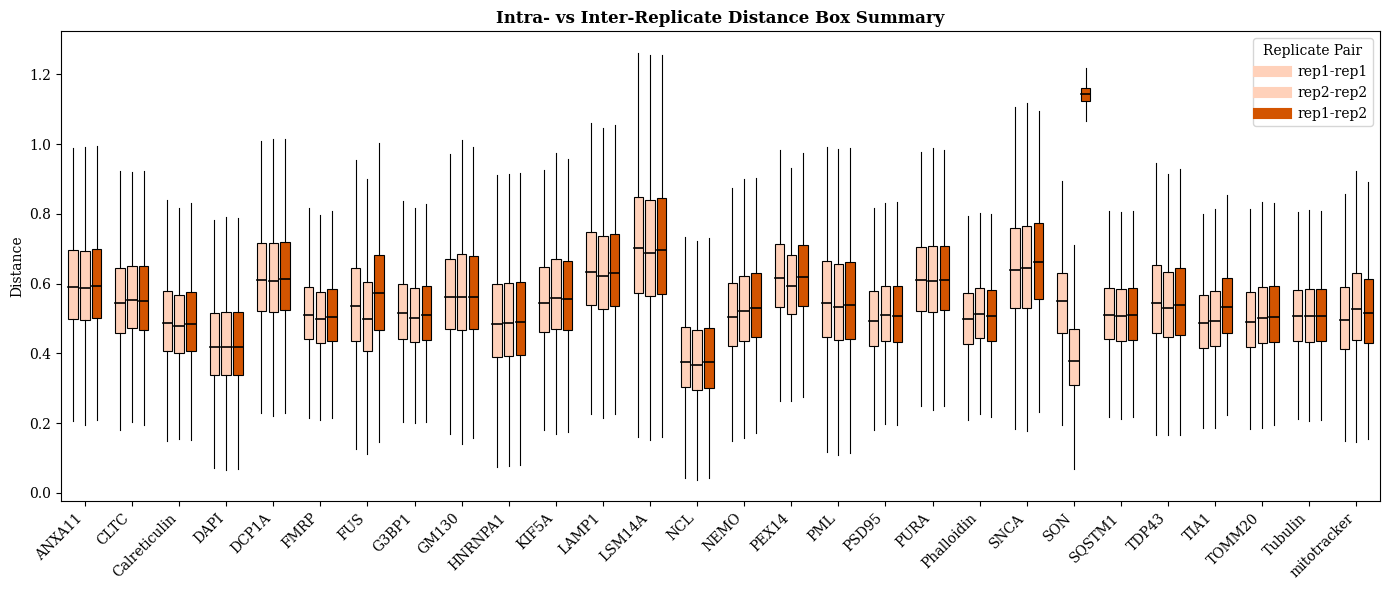

In [26]:
plot_replicate_boxes(df)

In [56]:
df.loc[df.label=='SON']

,rep1,rep2,label,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p5,...,p25,p50,p75,p90,p95,lower_whisker,upper_whisker,inter_higher_than_intras,intra1_thresh,intra2_thresh
63,1,1,SON,SON_rep1,SON_rep1,4,6,0.000856,0.010059,0.378156,...,0.457242,0.551240,0.631914,0.749148,0.807714,0.195233,0.893923,None,0.583509,0.625108
64,1,2,SON,SON_rep1,SON_rep2,4,13208,0.014444,0.000405,1.090803,...,1.122609,1.142288,1.161059,1.178669,1.188380,1.064935,1.218733,True,0.583509,0.625108
65,2,2,SON,SON_rep2,SON_rep2,3302,5449951,0.026114,0.016604,0.238942,...,0.310084,0.379028,0.470659,0.575294,0.647276,0.069220,0.711523,None,0.583509,0.625108


In [82]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel, wilcoxon

def per_group_replicate_tests(df: pd.DataFrame, metric: str = 'p50') -> pd.DataFrame:
    """
    For each base label (everything before the final '_repX'), extract:
      - rep1–rep1 p50
      - rep2–rep2 p50
      - rep1–rep2 p50
    and then perform, for each group, both:
      * a paired t-test comparing [rep1–rep2] to the two intra values
      * a Wilcoxon signed-rank test on the same
    Returns a DataFrame with one row per group and columns:
      group, val11, val22, val12, t_stat, t_pvalue, w_stat, w_pvalue, diff
    """
    def get_base(label): return "_".join(label.split("_")[:-1])
    def get_rep(label):  return label.split("_")[-1]

    records = []
    df2 = df.copy()
    df2['group'] = df2['label1'].map(get_base)
    df2['rep1']  = df2['label1'].map(get_rep)
    df2['rep2']  = df2['label2'].map(get_rep)
    df2 = df2[df2['group'] == df2['label2'].map(get_base)]

    for grp, sub in df2.groupby('group'):
        try:
            v11 = sub[(sub.rep1=='rep1') & (sub.rep2=='rep1')][metric].iloc[0]
            v22 = sub[(sub.rep1=='rep2') & (sub.rep2=='rep2')][metric].iloc[0]
            v12 = sub[(sub.rep1=='rep1') & (sub.rep2=='rep2')][metric].iloc[0]
        except IndexError:
            # missing one of the three comparisons → skip
            continue

        # paired arrays
        intra = np.array([v11, v22])
        inter = np.array([v12, v12])  # repeat so it's paired length=2

        t_stat, t_p = ttest_rel(inter, intra)
        w_stat, w_p = wilcoxon(inter, intra)

        records.append({
            'group':    grp,
            'rep1-1':   v11,
            'rep2-2':   v22,
            'rep1-2':   v12,
            't_stat':   t_stat,
            't_pval':   t_p,
            'w_stat':   w_stat,
            'w_pval':   w_p,
            'diff':     v12 - intra.mean()
        })

    return pd.DataFrame(records).set_index('group')



In [88]:
per_label_results = per_group_replicate_tests(df, metric='p50')

In [89]:
per_label_results

,rep1-1,rep2-2,rep1-2,t_stat,t_pval,w_stat,w_pval,diff
group,,,,,,,,
ANXA11,0.591663,0.586430,0.594384,2.040150,0.290136,0.0,0.5,0.005338
CLTC,0.544015,0.554305,0.551617,0.477443,0.716424,1.0,1.0,0.002456
Calreticulin,0.486806,0.478965,0.484447,0.398214,0.758743,1.0,1.0,0.001561
DAPI,0.417664,0.419377,0.418624,0.121337,0.923131,1.0,1.0,0.000104
DCP1A,0.610901,0.608686,0.613051,2.942928,0.208529,0.0,0.5,0.003258
FMRP,0.508787,0.497645,0.504648,0.257104,0.839793,1.0,1.0,0.001432
FUS,0.534832,0.499895,0.572443,3.153108,0.195514,0.0,0.5,0.055079
G3BP1,0.515014,0.502335,0.509830,0.182374,0.885159,1.0,1.0,0.001156
GM130,0.560622,0.562393,0.563140,1.843632,0.316397,0.0,0.5,0.001633


In [97]:
def median_diff(df):
    records = []
    for lbl, grp in df.groupby('label'):
        intra = grp.loc[grp['rep1']==grp['rep2'], 'p50']
        inter = grp.loc[grp['rep1']!=grp['rep2'], 'p50']
        if intra.empty or inter.empty:
            continue
        med_intra = intra.median()
        med_inter = inter.median()
        abs_diff  = med_inter - med_intra
        rel_diff  = abs_diff / med_intra  # fractional increase
        records.append({
            'label': lbl,
            'med_intra': med_intra,
            'med_inter': med_inter,
            'abs_diff': abs_diff,
            'rel_diff': rel_diff
        })
    return pd.DataFrame(records)

In [100]:
result = median_diff(df)

In [102]:
result.sort_values('rel_diff', ascending=False)

,label,med_intra,med_inter,abs_diff,rel_diff
21,SON,0.465134,1.142288,0.677155,1.455828
6,FUS,0.517364,0.572443,0.055079,0.106461
24,TIA1,0.490287,0.534354,0.044067,0.089879
14,NEMO,0.513180,0.531316,0.018136,0.035341
20,SNCA,0.642076,0.662397,0.020321,0.031649
15,PEX14,0.604653,0.618665,0.014011,0.023173
25,TOMM20,0.496833,0.505581,0.008749,0.017609
17,PSD95,0.501801,0.508040,0.006239,0.012433
0,ANXA11,0.589046,0.594384,0.005338,0.009062
27,mitotracker,0.511530,0.515955,0.004424,0.008649


In [103]:
from scipy import stats

def compute_outlier_measures(df):
    results = []

    for label, group_df in df.groupby('label'):
        rep1_eq_rep2 = group_df['rep1'] == group_df['rep2']
        group_values = group_df[rep1_eq_rep2]['p50'].values
        x_values = group_df[~rep1_eq_rep2]['p50'].values

        if len(group_values) < 2 or len(x_values) == 0:
            continue  # Skip if not enough data

        mu = group_values.mean()
        sigma = group_values.std(ddof=1)
        med = np.median(group_values)
        mad = np.median(np.abs(group_values - med))

        for x in x_values:
            z = (x - mu) / sigma if sigma != 0 else np.inf
            mz = 0.6745 * (x - med) / mad if mad != 0 else (np.inf if x != med else 0.0)
            d = (x - mu) / sigma if sigma != 0 else np.inf
            t_stat = (x - mu) / (sigma / np.sqrt(len(group_values))) if sigma != 0 else np.inf
            p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=len(group_values) - 1)) if sigma != 0 else 0.0

            results.append({
                'label': label,
                'value': x,
                'z_score': z,
                'modified_z_score': mz,
                'cohens_d': d,
                't_stat': t_stat,
                't_pvalue': p_value
            })

    return pd.DataFrame(results)


In [111]:
compute_outlier_measures(df).sort_values('z_score', ascending=False)

,label,value,z_score,modified_z_score,cohens_d,t_stat,t_pvalue
20,SNCA,0.662397,9.714789,9.266812,9.714789,13.738787,0.046256
18,PURA,0.611607,8.982305,8.568104,8.982305,12.702897,0.050013
24,TIA1,0.534354,7.962438,7.595267,7.962438,11.260588,0.056387
26,Tubulin,0.507401,6.718243,6.408445,6.718243,9.501031,0.066760
21,SON,1.142288,5.560820,5.304394,5.560820,7.864187,0.080520
6,FUS,0.572443,2.229584,2.126771,2.229584,3.153108,0.195514
4,DCP1A,0.613051,2.080964,1.985005,2.080964,2.942928,0.208529
9,HNRNPA1,0.489961,2.049328,1.954828,2.049328,2.898188,0.211518
14,NEMO,0.531316,1.455328,1.388218,1.455328,2.058144,0.287933
0,ANXA11,0.594384,1.442604,1.376081,1.442604,2.040150,0.290136


In [ ]:
## Batch 8 GM30 has rep effect umap1